In [170]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Users\Aarya\Downloads\Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [171]:
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [172]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [173]:
df.shape

(891, 9)

In [174]:
df = df.drop('Cabin', axis=1)

In [175]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [176]:
df = df.dropna(subset=['Embarked'])

In [177]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [178]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [179]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [180]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [181]:
df['Sex'] = df['Sex'].map({'male' : 0, 'female' : 1})
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [182]:
df[df['Survived'] == 1].count()

Survived    340
Pclass      340
Sex         340
Age         340
SibSp       340
Parch       340
Fare        340
Embarked    340
dtype: int64

In [183]:
df['Pclass'].unique()

df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [184]:
df = df.drop(['Fare'], axis=1)

In [192]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,0
1,1,1,1,38.0,1,0,1
2,1,3,1,26.0,0,0,0
3,1,1,1,35.0,1,0,0
4,0,3,0,35.0,0,0,0


In [186]:
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,0
1,1,1,1,38.0,1,0,1
2,1,3,1,26.0,0,0,0
3,1,1,1,35.0,1,0,0
4,0,3,0,35.0,0,0,0


In [191]:
# df = df.drop(['SibSp', 'Parch'], axis = 1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,0
1,1,1,1,38.0,1,0,1
2,1,3,1,26.0,0,0,0
3,1,1,1,35.0,1,0,0
4,0,3,0,35.0,0,0,0


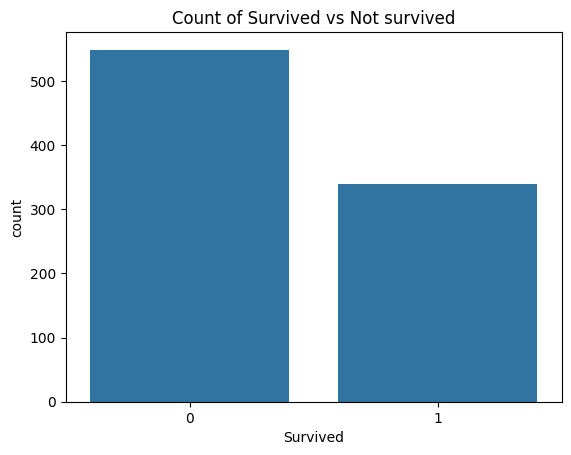

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Survived', data=df)
plt.title('Count of Survived vs Not survived')
plt.show()

In [193]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]
Y = df['Survived']

In [190]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
    }

for model_name, model in models.items():
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    acc = accuracy_score(Y_test,Y_pred)
    print(f"{model_name} Accuracy: {acc:.2f}")

Logistic Regression Accuracy: 0.79
Naive Bayes Accuracy: 0.75
Random Forest Accuracy: 0.81
K-Nearest Neighbors Accuracy: 0.77
